2.1. Histogram Equalization

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from functions import *

2.1.1. Write a program that can compute the histogram of a grayscale image (assuming 256 levels of gray). In a separate 
main program, apply the program to Camera Man image, and illustrate the histogram as a stem plot besides the 
test image (using “subplot” function). 

In [23]:
# load image
image = cv2.imread('Camera Man.bmp')
# calculate histogram
pdf = calc_histogram(image)
width , length , bands = image.shape


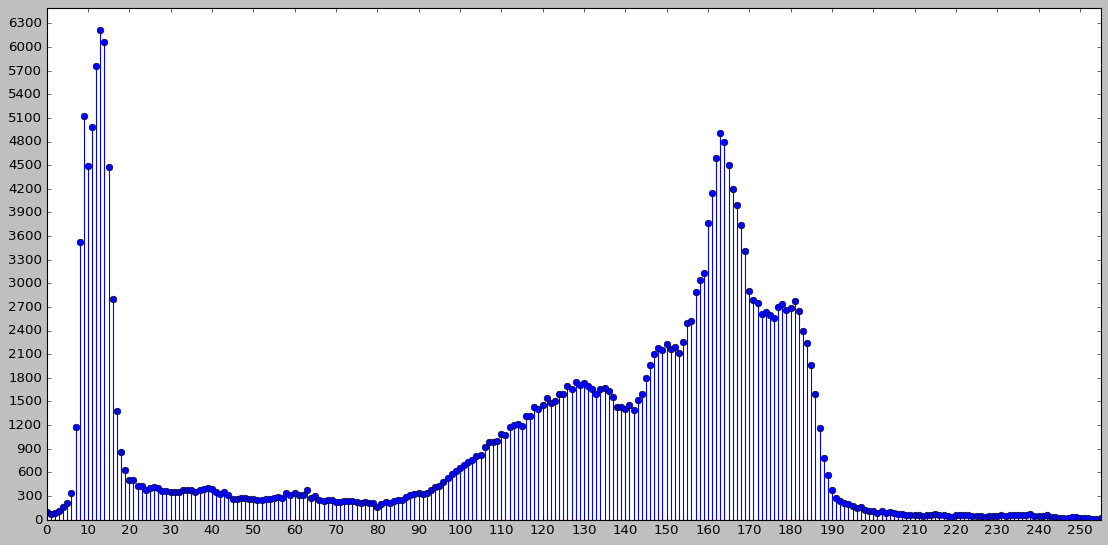

In [24]:
# plt.style.use('_mpl-gallery')
plt.style.use(plt.style.available[5])

# plot histogram
fig, ax = plt.subplots(figsize=(17,8))
x = np.arange(0,256,1)
y = pdf
ax.stem(x,y)

ax.set(xlim=(0, 255), xticks=np.arange(0, 255,10),
       ylim=(0, 6501), yticks=np.arange(0, 6501,300))

plt.show()

2.1.1.1. Decrease the brightness of Camera Man by dividing the intensity values by 3 and named output as D.


Text(0.5, 1.0, 'the D image')

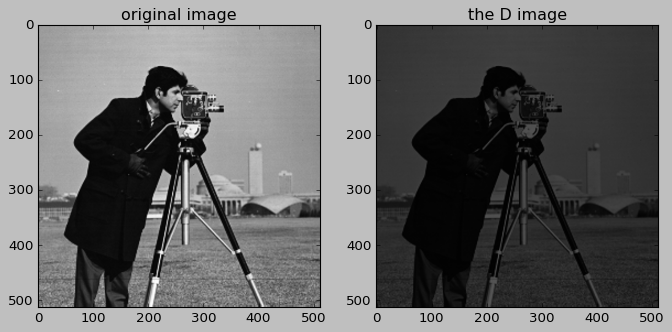

In [25]:
image = cv2.imread('Camera Man.bmp')

# decreasing brightness by dividing values by 3
D = np.copy(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        D[i][j] = image[i][j]/3

        
figure = plt.figure(figsize=(10,10))
plt.style.use(plt.style.available[5])

figure.add_subplot(1,2,1)
plt.imshow(image)
plt.title('original image',color='black')
# plt.show()

figure.add_subplot(1,2,2)
plt.imshow(D)
plt.title('the D image',color='black')
# plt.show()


2.1.1.2. Plot the histograms of Input and D. What can you observe from these two histograms?


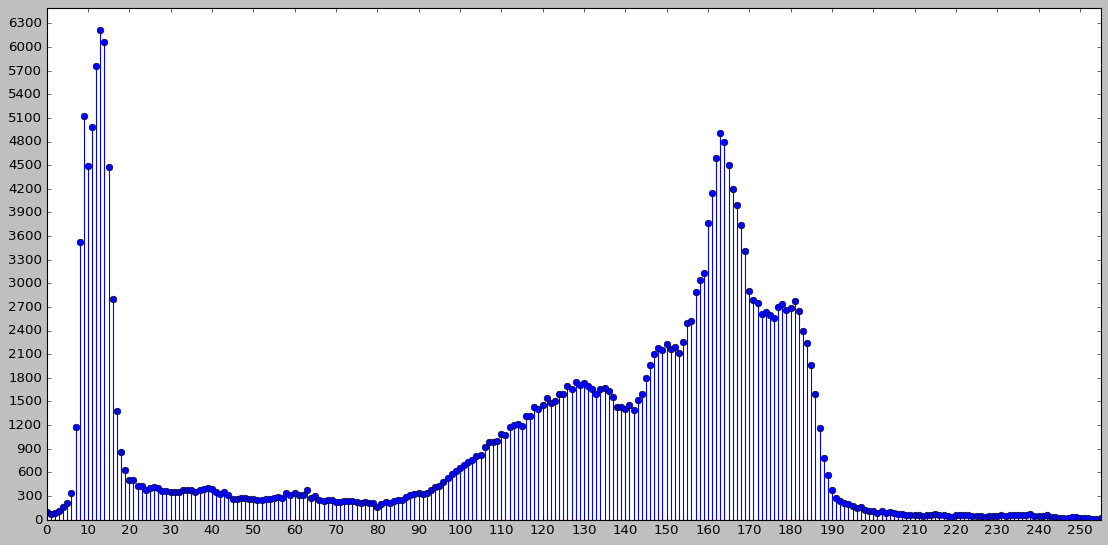

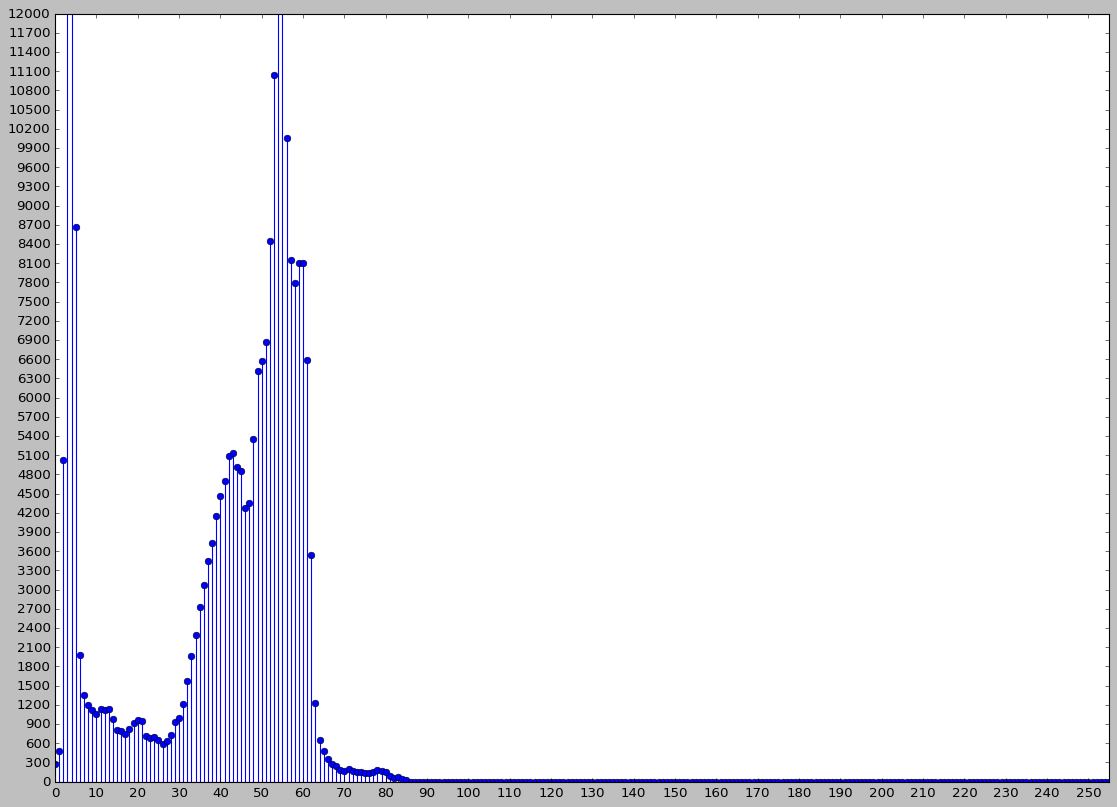

In [26]:
# plot original image histogram
fig, ax = plt.subplots(figsize=(17,8))
x = np.arange(0,256,1)
y = pdf
ax.stem(x,y)

ax.set(xlim=(0, 255), xticks=np.arange(0, 255,10),
       ylim=(0, 6501), yticks=np.arange(0, 6501,300))

plt.show()

# plot D image histogram
D_pdf = calc_histogram(D)
fig, ax = plt.subplots(figsize=(17,12))
x = np.arange(0,256,1)
y = D_pdf
ax.stem(x,y)

ax.set(xlim=(0, 255), xticks=np.arange(0, 255,10),
       ylim=(0, 12001), yticks=np.arange(0, 12001,300))

plt.show()

2.1.1.3. Perform histogram equalization on D and output the result as H.

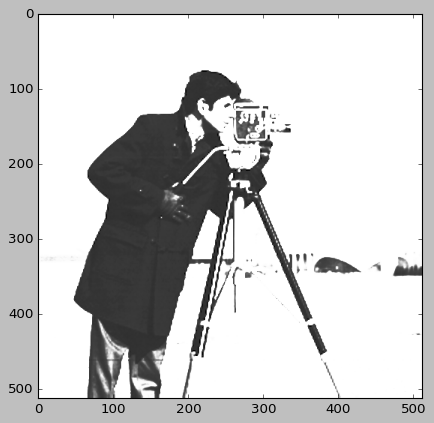

In [27]:
# first, we should normalize the pdf
normal_D_pdf = np.zeros(len(pdf))
normal_D_pdf = normalizeHistogram(D_pdf,D.shape[0],D.shape[1])
# calculating cdf
D_cdf = np.zeros(len(D_pdf))
D_cdf = calc_cdf(normal_D_pdf)
# re-map original image pixels to new ones
H = reMap(image,D_cdf)

plt.imshow(H)



2.1.1.4. Perform local histogram equalization on image D and output the result as L.



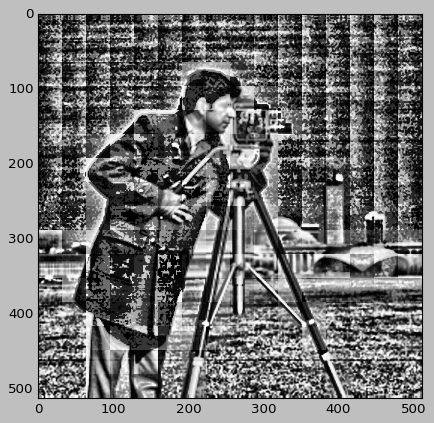

In [28]:
L = local_histo_equalization(D,32)
plt.imshow(L)

2.1.1.5. Plot the histograms of H and L. What’s the main difference between local and global histogram 
equalization?

(512, 512, 3)
(512, 512, 3)


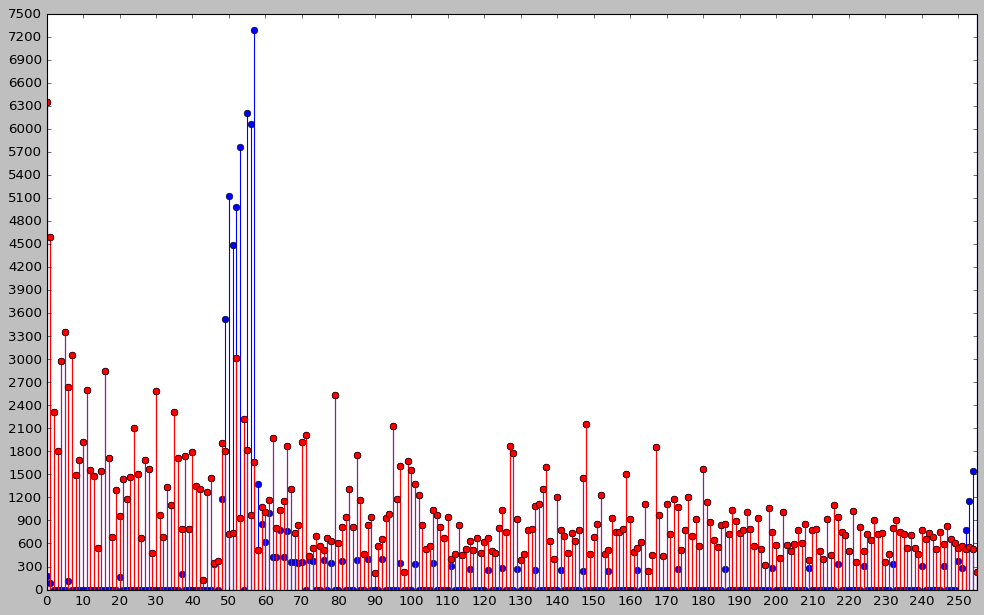

In [29]:
# plot H image histogram (blue)
fig, ax = plt.subplots(figsize=(15,9))
x = np.arange(0,256,1)
y = calc_histogram(H)
print(H.shape)
ax.stem(x,y)

# plot L image histogram (red)
y = calc_histogram(L)
print(L.shape)
ax.stem(x,y)
markerline ,stemlines ,baseline = ax.stem(x,y,linefmt='red',markerfmt='o')
markerline.set_color('red')

ax.set(xlim=(0, 255), xticks=np.arange(0, 255,10),
       ylim=(0, 7501), yticks=np.arange(0, 7501,300))

plt.show()

2.1.1.6. Perform the log transform, inverse log transform and power-law transform to enhance image D. Please 
adjust the parameters to obtain the results as best as you can. Show the parameters, resultant images 
and corresponding histograms. Provide some discussions on the results as well.

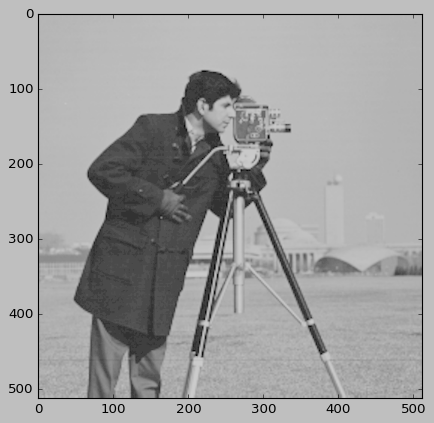

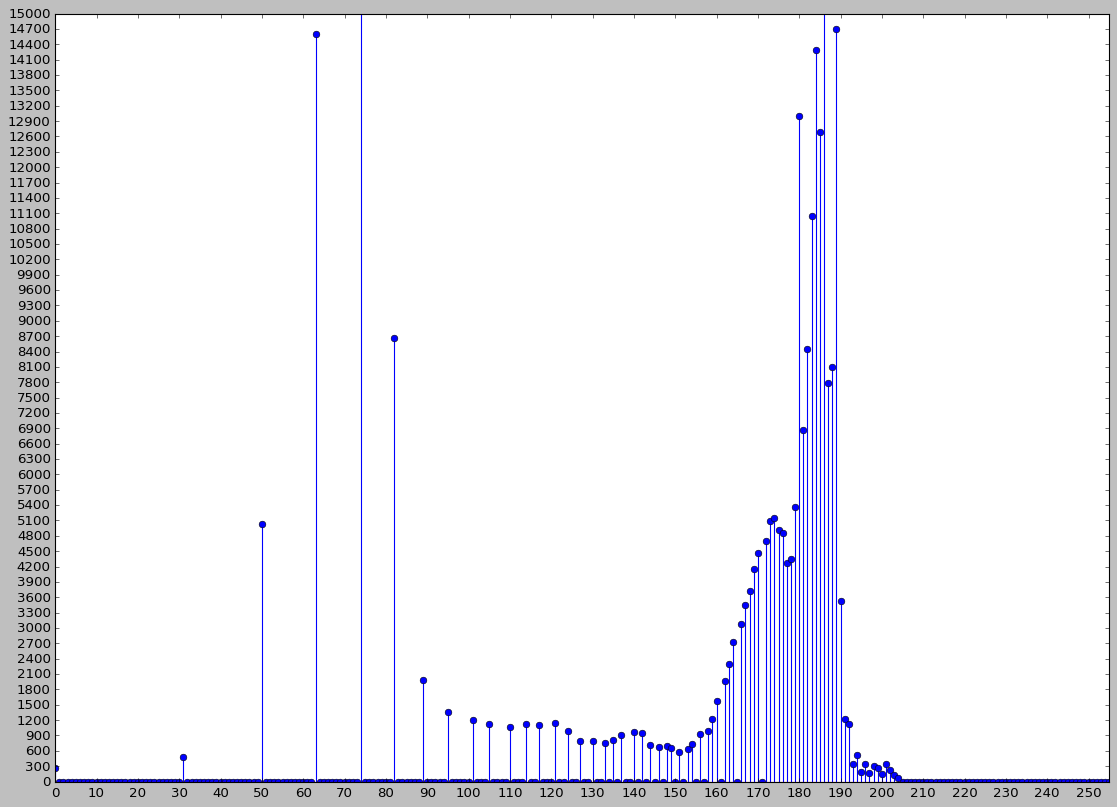

In [30]:
# log transform

# The value of c is chosen such that we get the maximum output value corresponding to the bit size used.
# e.g for 8 bit image, c is chosen such that we get max value equal to 255.
c = 255 / np.log(1 + np.max(image))

D_log = log_transform(D,c)
D_log = np.array(D_log, dtype = np.uint8)
plt.imshow(D_log)
plt.show()

# plot D_log image histogram
D_log_pdf = calc_histogram(D_log)
fig, ax = plt.subplots(figsize=(17,12))
x = np.arange(0,256,1)
y = D_log_pdf
ax.stem(x,y)

ax.set(xlim=(0, 255), xticks=np.arange(0, 255,10),
       ylim=(0, 15001), yticks=np.arange(0, 15001,300))

plt.show()

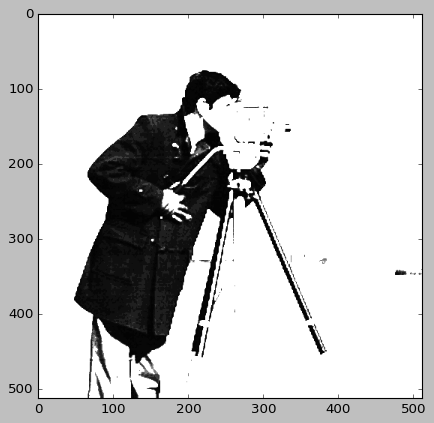

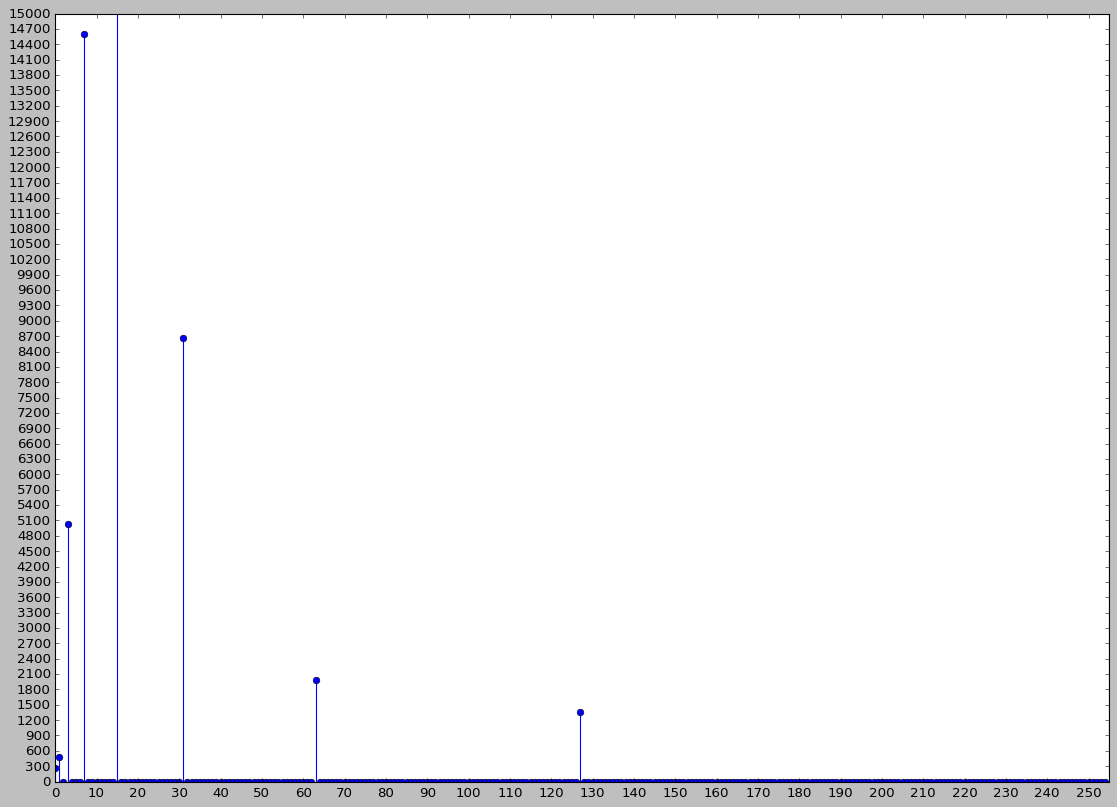

In [31]:
# inverse log transform
base = 2
# The value of c is chosen such that we get the maximum output value corresponding to the bit size used.
# e.g for 8 bit image, c is chosen such that we get max value equal to 255.
c = 255.0 / (pow(base, np.max(image)) - 1)

D_iLog = inverse_log_transform(D,c,base)
D_iLog = np.array(D_iLog, dtype = np.uint8)
plt.imshow(D_iLog)
plt.show()

# plot D_ilog image histogram
D_iLog_pdf = calc_histogram(D_iLog)
fig, ax = plt.subplots(figsize=(17,12))
x = np.arange(0,256,1)
y = D_iLog_pdf
ax.stem(x,y)

ax.set(xlim=(0, 255), xticks=np.arange(0, 255,10),
       ylim=(0, 15001), yticks=np.arange(0, 15001,300))

plt.show()

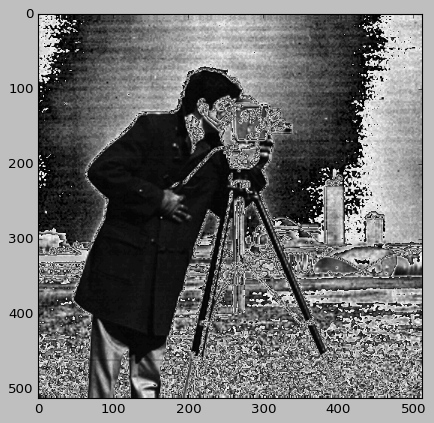

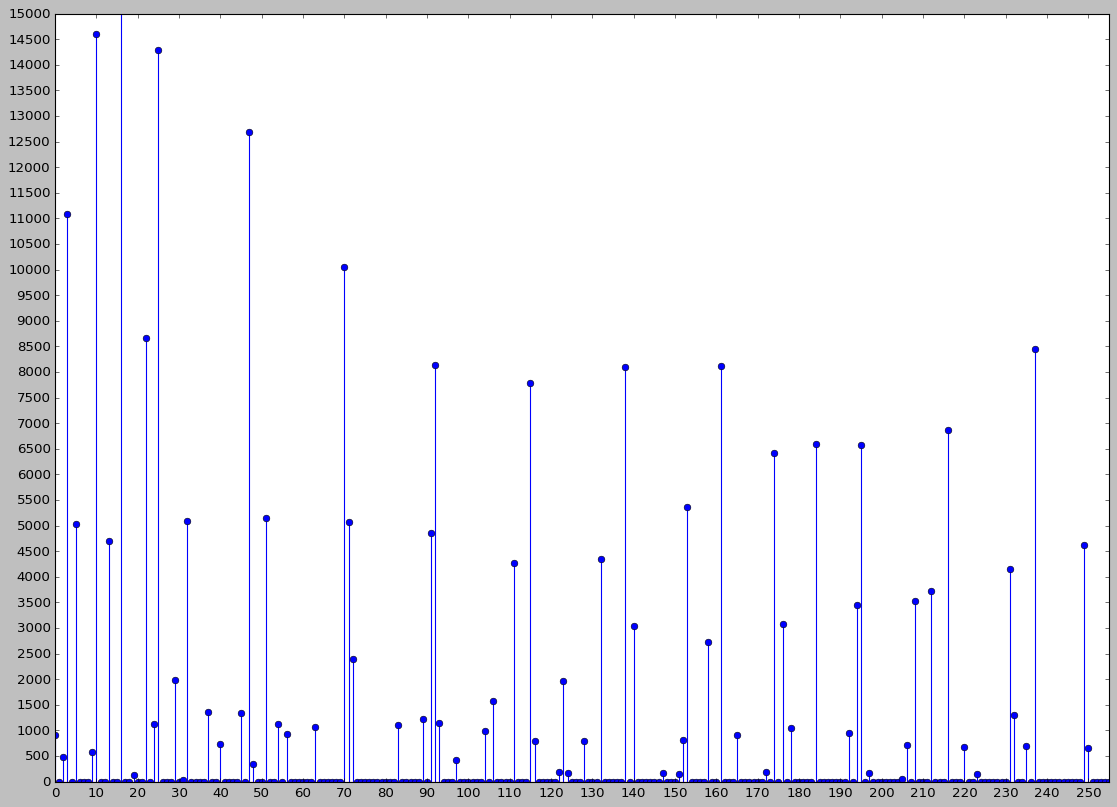

In [32]:
# power-law transform
gamma = 1.5

# The value of c is chosen such that we get the maximum output value corresponding to the bit size used.
# e.g for 8 bit image, c is chosen such that we get max value equal to 255.
# c = 255 / np.power(image,gamma)
c = 2
D_power = power_law_transform(D,c,gamma)
D_power = np.array(D_power, dtype = np.uint8)
plt.imshow(D_power)

# plot D_power image histogram
D_power_pdf = calc_histogram(D_power)
fig, ax = plt.subplots(figsize=(17,12))
x = np.arange(0,256,1)
y = D_power_pdf
ax.stem(x,y)

ax.set(xlim=(0, 255), xticks=np.arange(0, 255,10),
       ylim=(0, 15001), yticks=np.arange(0, 15001,500))

plt.show()

2.1.2. Write a program that performs histogram equalization on Camera Man image. Display the original and equalized 
images, as well as their corresponding histograms, all in one figure as mentioned in 2.1.1. 

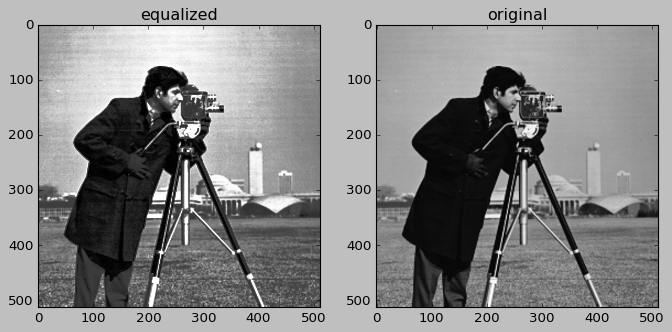

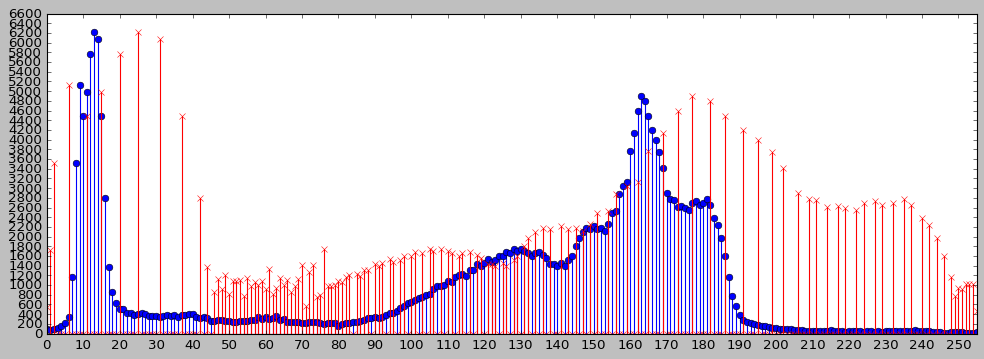

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from functions import *

cameraman = cv2.imread("Camera Man.bmp")
width , length ,band = cameraman.shape
cm_histogram = calc_histogram(cameraman)
cm_histogram_normal = normalizeHistogram(cm_histogram,width,length)
cm_cdf = calc_cdf(cm_histogram_normal)
newCameraMan = reMap(cameraman,cm_cdf)
ncm_histogram = calc_histogram(newCameraMan)


figure = plt.figure(figsize=(10,10))

figure.add_subplot(1,2,1)
plt.imshow(newCameraMan)
plt.title("equalized",color='black')

figure.add_subplot(1,2,2)
plt.imshow(cameraman)
plt.title("original",color='black')


# plot original image histogram
fig, ax = plt.subplots(figsize=(15,5))
x = np.arange(0,256,1)
y = cm_histogram
ax.stem(x,y)

y = ncm_histogram

markerline ,stemlines ,baseline = ax.stem(x,y,linefmt='red',markerfmt='x')
markerline.set_color('red')

ax.set(xlim=(0, 255), xticks=np.arange(0, 255,10),
       ylim=(0, 6601), yticks=np.arange(0, 6601,200))
plt.style.use(plt.style.available[5])
plt.show()



2.2. Local Histogram Equalization

2.2.1. Implement a local histogram equalization with different windows size for the HE1,2,3, and 4 images. Explain and 
display the results. Discuss the effects of increasing window size and compare it with global histogram 
equalization in detail.

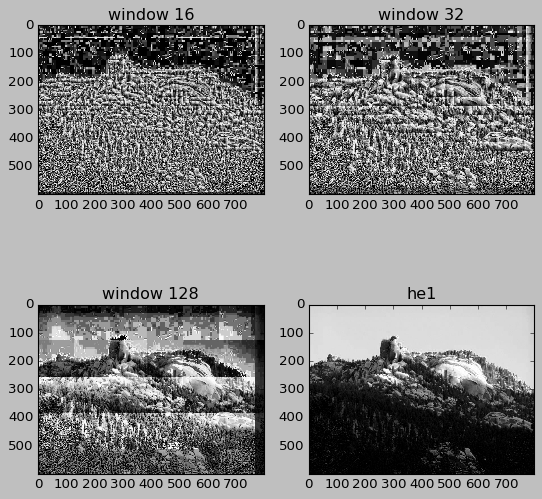

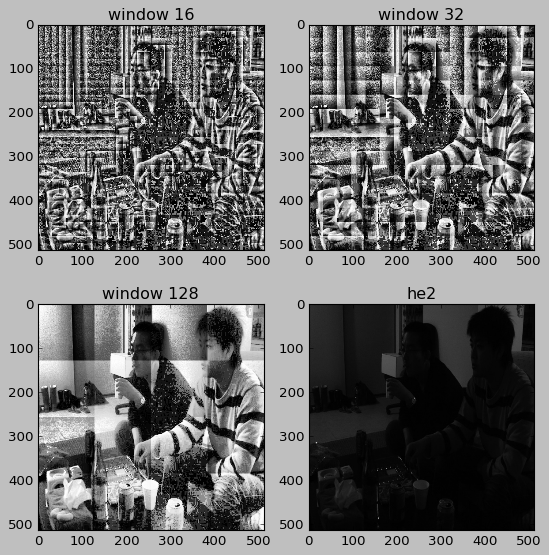

Text(0.5, 1.0, 'he4')

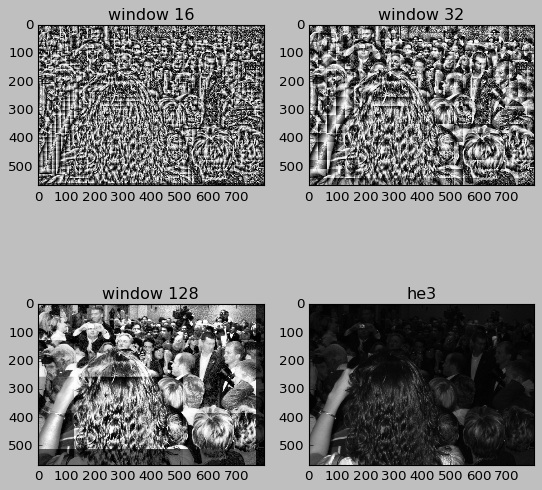

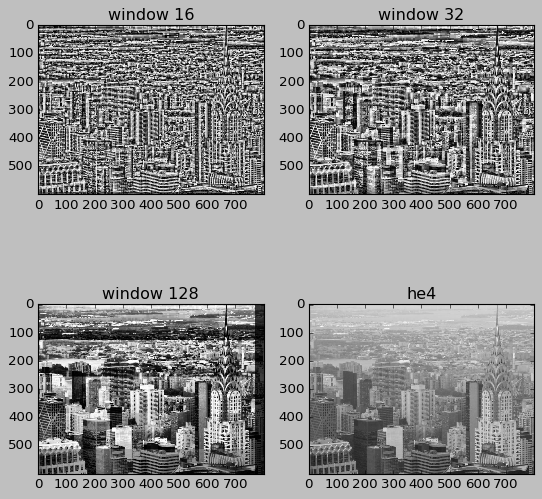

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from functions import *

he1 = cv2.imread('HE1.jpg')
he2 = cv2.imread('HE2.jpg')
he3 = cv2.imread("HE3.jpg")
he4 = cv2.imread('HE4.jpg')

local_eq1_he1 = local_histo_equalization(he1,16)
local_eq2_he1 = local_histo_equalization(he1,32)
local_eq3_he1 = local_histo_equalization(he1,128)

local_eq1_he2 = local_histo_equalization(he2,16)
local_eq2_he2 = local_histo_equalization(he2,32)
local_eq3_he2 = local_histo_equalization(he2,128)


local_eq1_he3 = local_histo_equalization(he3,16)
local_eq2_he3 = local_histo_equalization(he3,32)
local_eq3_he3 = local_histo_equalization(he3,128)

local_eq1_he4 = local_histo_equalization(he4,16)
local_eq2_he4 = local_histo_equalization(he4,32)
local_eq3_he4 = local_histo_equalization(he4,128)

figure = plt.figure(figsize=(8,8))
figure.add_subplot(2,2,1)
plt.imshow(local_eq1_he1)
plt.title("window 16",color='black')

figure.add_subplot(2,2,2)
plt.imshow(local_eq2_he1)
plt.title("window 32",color='black')

figure.add_subplot(2,2,3)
plt.imshow(local_eq3_he1)
plt.title("window 128",color='black')

figure.add_subplot(2,2,4)
plt.imshow(he1)
plt.title("he1",color='black')

figure = plt.figure(figsize=(8,8))
figure.add_subplot(2,2,1)
plt.imshow(local_eq1_he2)
plt.title("window 16",color='black')

figure.add_subplot(2,2,2)
plt.imshow(local_eq2_he2)
plt.title("window 32",color='black')


figure.add_subplot(2,2,3)
plt.imshow(local_eq3_he2)
plt.title("window 128",color='black')


figure.add_subplot(2,2,4)
plt.imshow(he2)
plt.title("he2",color='black')
plt.show()


figure = plt.figure(figsize=(8,8))
figure.add_subplot(2,2,1)
plt.imshow(local_eq1_he3)
plt.title("window 16",color='black')

figure.add_subplot(2,2,2)
plt.imshow(local_eq2_he3)
plt.title("window 32",color='black')


figure.add_subplot(2,2,3)
plt.imshow(local_eq3_he3)
plt.title("window 128",color='black')

figure.add_subplot(2,2,4)
plt.imshow(he3)
plt.title("he3",color='black')

figure = plt.figure(figsize=(8,8))
figure.add_subplot(2,2,1)
plt.imshow(local_eq1_he4)
plt.title("window 16",color='black')

figure.add_subplot(2,2,2)
plt.imshow(local_eq2_he4)
plt.title("window 32",color='black')


figure.add_subplot(2,2,3)
plt.imshow(local_eq3_he4)
plt.title("window 128",color='black')


figure.add_subplot(2,2,4)
plt.imshow(he4)
plt.title("he4",color='black')
